## Cálculo do Retorno de uma Carteira de Ações


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

Definição dos ativos financeiros e seus pesos (%) nas carteiras Brasileira e Americana.

In [2]:
br_tickers_n_weights = (
    ("WEGE3.SA", 0.0720),
    ("VALE3.SA", 0.0622),
    ("PETR4.SA", 0.0523),
    ("ARZZ3.SA", 0.0262),
    ("LREN3.SA", 0.0262),
    ("GRND3.SA", 0.0262),
    ("ABEV3.SA", 0.0523),
    ("MDIA3.SA", 0.0423),
    ("SLCE3.SA", 0.0423),
    ("PSSA3.SA", 0.0436),
    ("ITUB3.SA", 0.0664),
    ("BBDC4.SA", 0.0664),
    ("BBAS3.SA", 0.0664),
    ("RADL3.SA", 0.0436),
    ("ODPV3.SA", 0.0436),
    ("FLRY3.SA", 0.0436),
    ("HYPE3.SA", 0.0436),
    ("VIVT3.SA", 0.0562),
    ("EGIE3.SA", 0.0623),
    ("EQTL3.SA", 0.0623),
)

usa_tickers_n_weights = (
    ("MMM", 0.03571428571),
    ("WST", 0.03571428571),
    ("PG", 0.03571428571),
    ("JPM", 0.03571428571),
    ("TXN", 0.03571428571),
    ("ROST", 0.03571428571),
    ("JNJ", 0.03571428571),
    ("PAYX", 0.03571428571),
    ("FAST", 0.03571428571),
    ("EXPD", 0.03571428571),
    ("NKE", 0.03571428571),
    ("DIS", 0.03571428571),
    ("TTC", 0.03571428571),
    ("AAPL", 0.03571428571),
    ("UNH", 0.03571428571),
    ("ADBE", 0.03571428571),
    ("GOOGL", 0.03571428571),
    ("COST", 0.03571428571),
    ("ANSS", 0.03571428571),
    ("HD", 0.03571428571),
    ("ACN", 0.03571428571),
    ("BLK", 0.03571428571),
    ("MSFT", 0.03571428571),
    ("VNQ", 0.03571428571),
    ("VOO", 0.03571428571),
    ("VIOV", 0.03571428571),
    ("VBR", 0.03571428571),
    ("VPL", 0.03571428571),
)

br_index_ticker = "^BVSP"

usa_index_ticker = "^GSPC"

Download dos dados dos ativos financeiros a partir do Yahoo Finance a partir de 02/02/2011.

In [3]:
br_stock_data = pd.DataFrame()
br_index_data = pd.DataFrame()
usa_stock_data = pd.DataFrame()
usa_index_data = pd.DataFrame()
start_date: str = "2011-02-02"
end_date: str = datetime.now().strftime("%Y-%m-%d")

for t in br_tickers_n_weights:
    ticker: str = t[0]
    br_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_tickers_n_weights:
    ticker: str = t[0]
    usa_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

br_index_data[br_index_ticker]: dict = yf.download(
    br_index_ticker, progress=False, start=start_date, end=end_date
)["Adj Close"]

usa_index_data[usa_index_ticker]: dict = yf.download(
    usa_index_ticker,
    progress=False,
    start=start_date,
    end=end_date,
)["Adj Close"]

---


### Gráficos

Gráfico Normalizado das Ações Brasileiras:

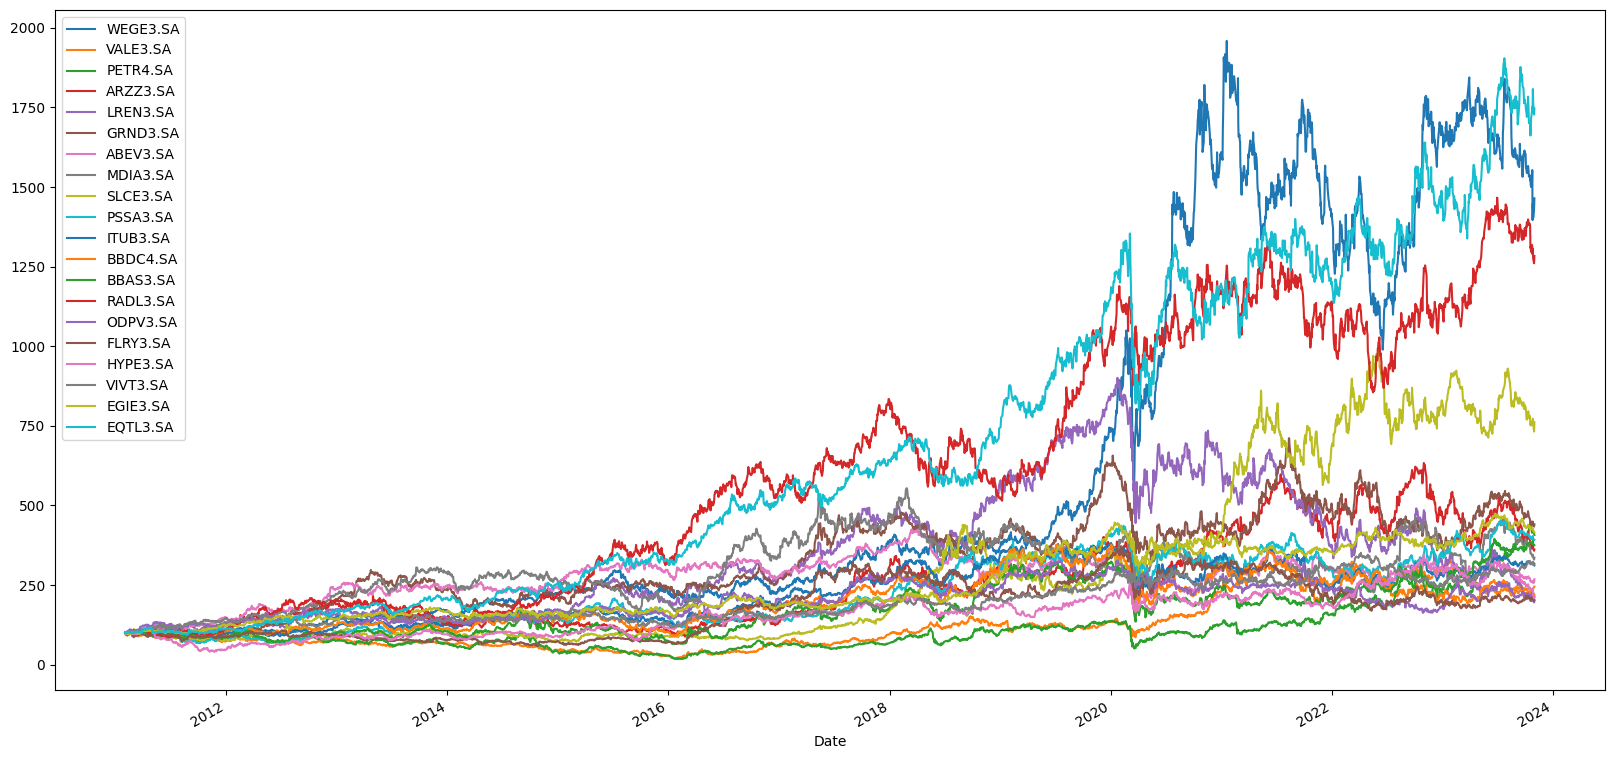

In [4]:
(br_stock_data / br_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Brasileiro:

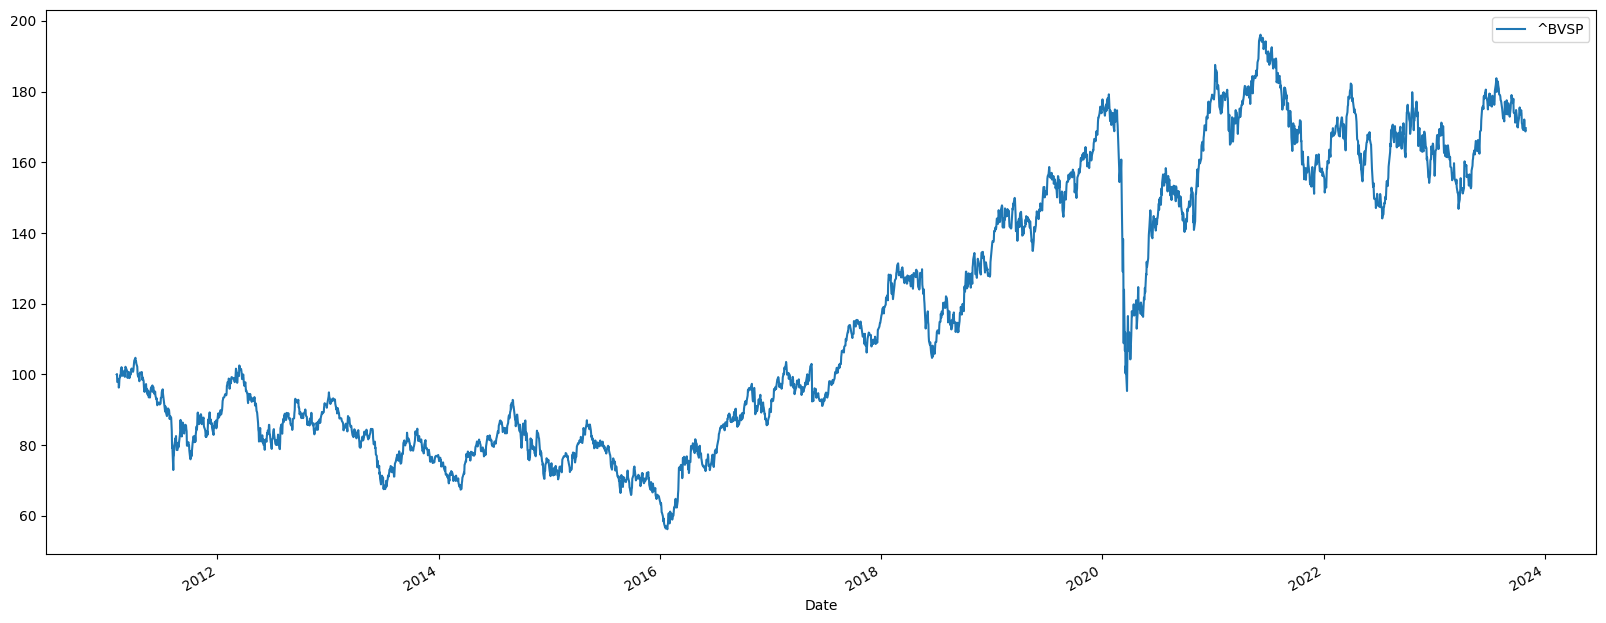

In [5]:
(br_index_data / br_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

Gráfico Normalizado das Ações Americanas:

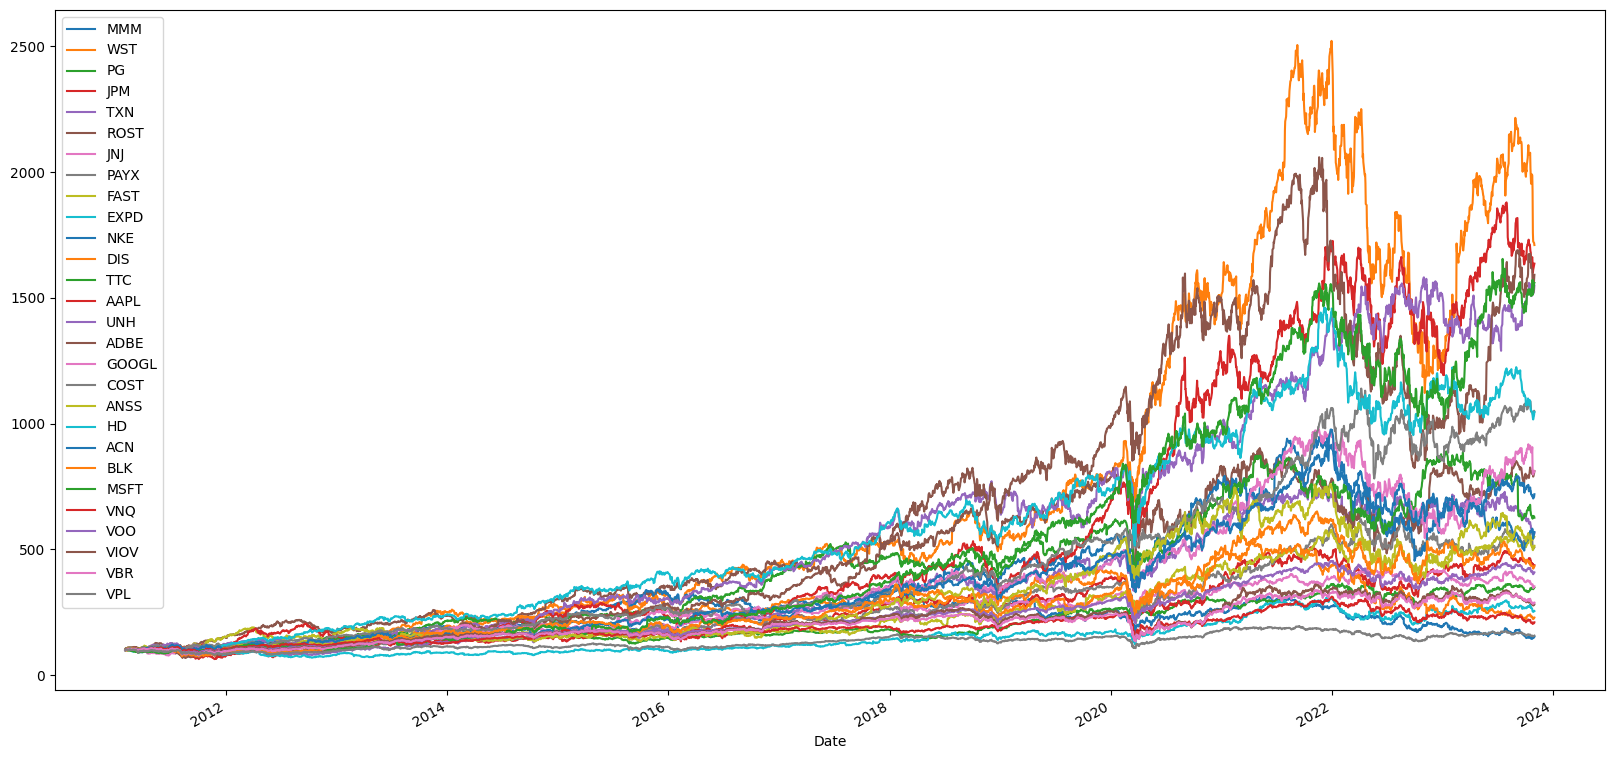

In [6]:
(usa_stock_data / usa_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Americano:

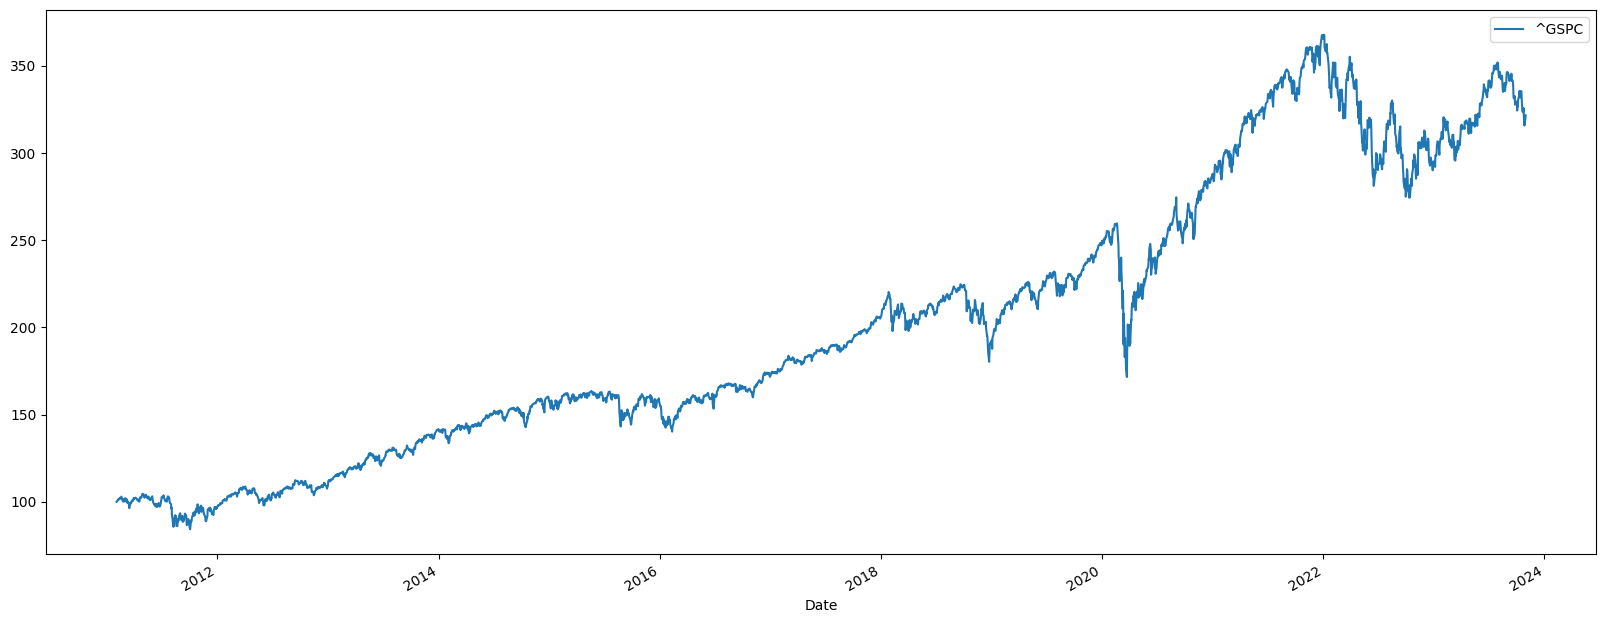

In [7]:
(usa_index_data / usa_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

---


### Calculando o Retorno Médio de uma Carteira de Ações


Calcular o retorno simples dos ativos financeiros da carteira e armazenar os resultados em uma nova tabela.


In [8]:
br_index_returns = (br_index_data / br_index_data.shift(1)) - 1
br_stock_returns = (br_stock_data / br_stock_data.shift(1)) - 1

usa_index_returns = (usa_index_data / usa_index_data.shift(1)) - 1
usa_stock_returns = (usa_stock_data / usa_stock_data.shift(1)) - 1

Armazenar os pesos dos ativos financeiros das carteiras para que se possa calcular o produto escalar dos retornos anuais com seus respectivos pesos.


In [9]:
br_weights = np.array([tw[1] for tw in br_tickers_n_weights])
usa_weights = np.array([tw[1] for tw in usa_tickers_n_weights])

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Brasileira.

In [10]:
br_index_annual_returns = br_index_returns.mean() * 250
br_stock_annual_returns = br_stock_returns.mean() * 250
br_stock_annual_returns

WEGE3.SA    0.263023
VALE3.SA    0.156903
PETR4.SA    0.220170
ARZZ3.SA    0.179733
LREN3.SA    0.127745
GRND3.SA    0.166712
ABEV3.SA    0.112228
MDIA3.SA    0.152020
SLCE3.SA    0.224065
PSSA3.SA    0.153331
ITUB3.SA    0.133839
BBDC4.SA    0.119983
BBAS3.SA    0.187259
RADL3.SA    0.251763
ODPV3.SA    0.109015
FLRY3.SA    0.106555
HYPE3.SA    0.115579
VIVT3.SA    0.131520
EGIE3.SA    0.140687
EQTL3.SA    0.262858
dtype: float64

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Americana.

In [11]:
usa_index_annual_returns = usa_index_returns.mean() * 250
usa_stock_annual_returns = usa_stock_returns.mean() * 250
usa_stock_annual_returns

MMM      0.058115
WST      0.257979
PG       0.112457
JPM      0.153864
TXN      0.171462
ROST     0.207995
JNJ      0.112922
PAYX     0.152478
FAST     0.168796
EXPD     0.102307
NKE      0.173809
DIS      0.098913
TTC      0.172177
AAPL     0.258220
UNH      0.245480
ADBE     0.264339
GOOGL    0.200087
COST     0.204019
ANSS     0.168496
HD       0.210627
ACN      0.183627
BLK      0.152801
MSFT     0.248624
VNQ      0.078747
VOO      0.125001
VIOV     0.105757
VBR      0.104794
VPL      0.049999
dtype: float64

Calcular o produto escalar dos retornos anuais e seus pesos, em seguida, exibir o resultado percentual.


In [12]:
for i in (
    (
        "Rentabilidade Média Anual do Portfólio BR:",
        br_stock_annual_returns,
        br_weights,
    ),
    ("Rentabilidade Média Anual do Índice BR:", br_index_annual_returns, [1]),
    (
        "\nRentabilidade Média Anual do Portfólio USA:",
        usa_stock_annual_returns,
        usa_weights,
    ),
    ("Rentabilidade Média Anual do Índice USA:", usa_index_annual_returns, [1]),
):
    produto_escalar = np.dot(i[1], i[2])
    result = "{0:.2f} %".format(round(produto_escalar, 5) * 100)
    print(i[0], result)

Rentabilidade Média Anual do Portfólio BR: 16.83 %
Rentabilidade Média Anual do Índice BR: 7.19 %

Rentabilidade Média Anual do Portfólio USA: 16.23 %
Rentabilidade Média Anual do Índice USA: 10.65 %


O retorno desta carteira é satisfatório?
